In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load data
csv_values = pd.read_csv('exampleValues.csv')

In [3]:
# Bubble chart functions
def map_colors(time):
    """Map the color of the bubbles"""
    colors = {'Muito Alto': 'red', 'Alto': 'blue', 'Médio': 'yellow', 'Baixo': 'green'}
    return np.array([colors[t] for t in time])

def map_sizes(financial_impact):
    """Map the size of the bubbles"""
    return (np.array(financial_impact) / max(financial_impact)) * 3000

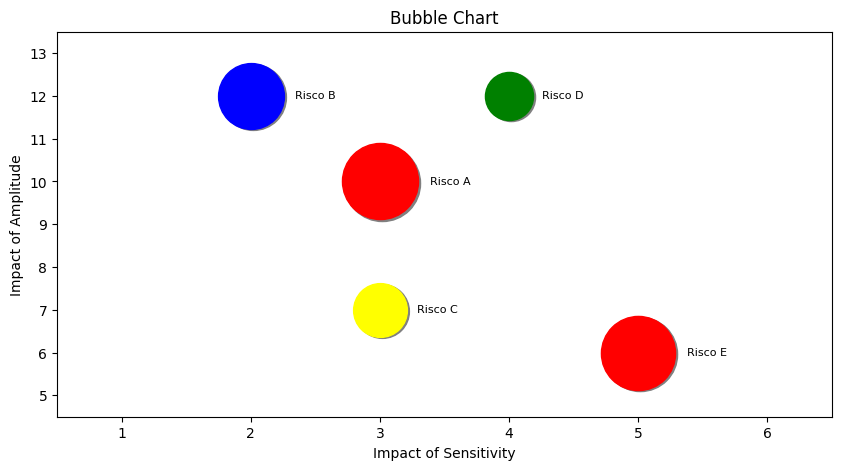

In [4]:
# Bubble chart

# Get data from DataFrame columns
risk_names = csv_values['Nome do Risco'].values
x = csv_values['Impacto de Sensibilidade'].values
y = csv_values['Impacto de Amplitude'].values
time = csv_values['Tempo'].values
financial_impact = csv_values['Impacto Financeiro'].values

# Map colors and sizes
mapped_colors = map_colors(time)
sizes = map_sizes(financial_impact)

# Plotting configuration
plt.figure(figsize=(10, 5))
plt.xlim(min(x) - 1.5, max(x) + 1.5)
plt.ylim(min(y) - 1.5, max(y) + 1.5)
plt.gca().set_facecolor('white')

# Add shadow effect
for i in range(len(x)):
    plt.scatter(x[i] + 0.015, y[i] - 0.03, s=sizes[i], c='gray', alpha=1)

for i in range(len(x)):
    plt.scatter(x[i], y[i], s=sizes[i], c=mapped_colors[i], alpha=1)
    
    # Calculate radius from size
    radius = np.sqrt(sizes[i] / np.pi)
    
    # Text placement relative to bubble edge
    text_adjustment = 0.2 + radius / 90  # Constant factor plus a term proportional to the radius
    plt.annotate(f'{risk_names[i]}', (x[i] + text_adjustment, y[i]), ha='center', va='center', fontsize=8, color='black')

plt.xlabel('Impact of Sensitivity')
plt.ylabel('Impact of Amplitude')
plt.title('Bubble Chart')

plt.show()